In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()
name = iris.feature_names
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
df = pd.DataFrame(iris.data, columns = name)
df['Predict'] = iris.target
df = df[df['Predict'] != 2]
Y = df['Predict']
df.drop(['sepal width (cm)'], axis = 1, inplace = True)
X = df[['sepal length (cm)','petal length (cm)','petal width (cm)']].values
df.head()

,sepal length (cm),petal length (cm),petal width (cm),Predict
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [30]:
df.describe()

,sepal length (cm),petal length (cm),petal width (cm),Predict
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,2.861000,0.786000,0.500000
std,0.641698,1.449549,0.565153,0.502519
min,4.300000,1.000000,0.100000,0.000000
25%,5.000000,1.500000,0.200000,0.000000
50%,5.400000,2.450000,0.800000,0.500000
75%,5.900000,4.325000,1.300000,1.000000
max,7.000000,5.100000,1.800000,1.000000


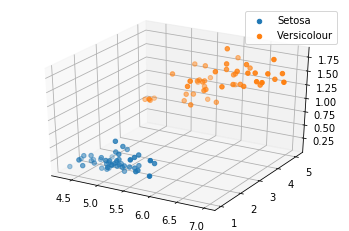

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], X[Y == 0][:, 2], label = 'Setosa')
ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], X[Y == 1][:, 2], label = 'Versicolour')
ax.legend()
plt.show()

In [32]:
def add_ones(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [33]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [34]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


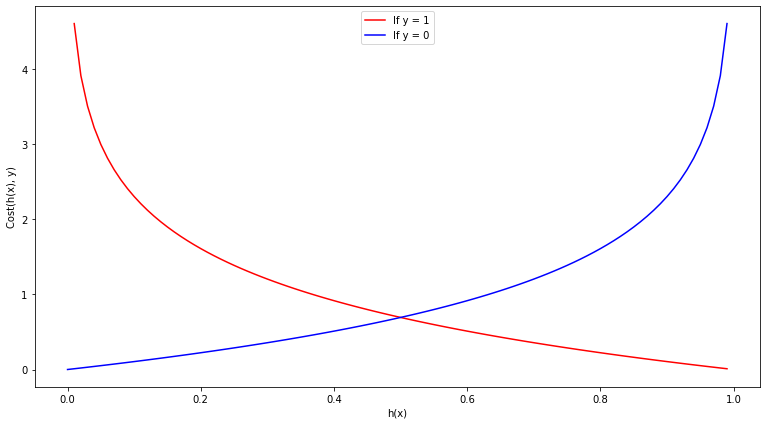

In [35]:
nums = np.arange(0, 1, step=.01)

fig, ax = plt.subplots(figsize=(13,7))


ax.plot(nums, np.multiply(1, -np.log(nums)), c='r', label='If y = 1')
ax.plot(nums, np.multiply(1, -np.log(1-nums)), c='b', label='If y = 0')
ax.set_xlabel('h(x)')
ax.set_ylabel('Cost(h(x), y)')
ax.legend(loc='upper center')
plt.show()

In [77]:
def grad(X, y, num, alpha):
    X = add_ones(X)
    M,N = X.shape
    theta = np.zeros(N)
    descent = []
    for i in range(num):
        h = sigmoid(np.dot(X, theta))
        gradients = np.dot(X.T, (h-y))/M
        theta -= alpha * gradients
        h = sigmoid(np.dot(X, theta))
        loss = cost(h, y)
        if i %10000 == 0:
            descent.append(loss)
            print(f'cost: {loss} \t', f'weights: {theta} \t')
    return descent

In [80]:
from sklearn import model_selection
X_train, X_test,Y_train, Y_test = model_selection.train_test_split(X, Y)
descent = grad(X_train,Y_train, 100000, 0.001)

cost: 0.692648602699912 	 weights: [-2.00000000e-05  1.35333333e-04  6.44000000e-04  2.57333333e-04] 	
cost: 0.09922289000085659 	 weights: [-0.33988526 -0.91521081  1.71408618  0.79228966] 	
cost: 0.05274548524181844 	 weights: [-0.44731286 -1.20770978  2.24918257  1.04797875] 	
cost: 0.03631846062216915 	 weights: [-0.51091207 -1.3823724   2.57052999  1.20415796] 	
cost: 0.027893161948762575 	 weights: [-0.55602308 -1.50733165  2.80112642  1.31768886] 	
cost: 0.02274933178236504 	 weights: [-0.59093708 -1.60479888  2.98134475  1.40736853] 	
cost: 0.019272132113366595 	 weights: [-0.61939386 -1.68479418  3.1294668   1.48175573] 	
cost: 0.016758695891888394 	 weights: [-0.6433975  -1.75269477  3.25532883  1.54547703] 	
cost: 0.014853617566732915 	 weights: [-0.66414611 -1.81172161  3.36483439  1.6013209 ] 	
cost: 0.013357650876858482 	 weights: [-0.6824126  -1.86395722  3.46180649  1.65110001] 	


In [81]:
x_val = np.arange(0,100000,10000)

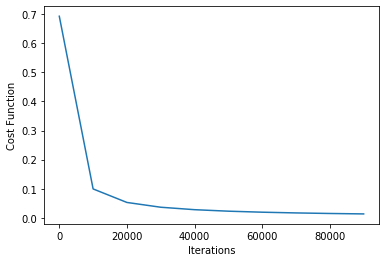

In [82]:
plt.plot(x_val, descent)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

In [88]:
weights = np.array([-0.6824126, -1.86395722, 3.46180649,  1.65110001]) 

In [89]:
def predict(X, theta):
    h = sigmoid(np.dot(X, theta))
    return h.round()

In [90]:
Y_predict = predict(add_ones(X_test), weights)

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predict)

array([[11,  0],
       [ 0, 14]], dtype=int64)